<a href="https://colab.research.google.com/github/SirineMaaroufi/Task1-TSF-Data-Science-Internship/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation: Data Science and Business Analytics Internship**
# **GRIP: May 2022**
### **Task 1 : Prediction using Supervised ML**
### Author: Sirine Maàroufi

### Importing the necessary libraries



In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data

In [ ]:
url='http://bit.ly/w-data'
mydata=pd.read_csv(url)

print("Data imported successfully")
mydata.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualizing The Data 

Let's plot the data points on a 2-D graph to visualize the data. 

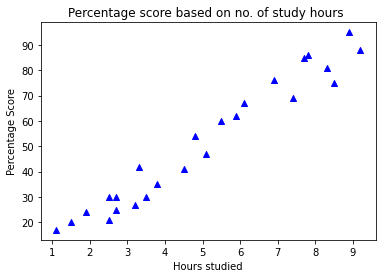

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set(title='Percentage score based on no. of study hours ' , 
       ylabel='Percentage Score' , xlabel= 'Hours studied')
ax.scatter(X,y,color='blue',marker='^')
plt.show()

From the graphe above, it's clear that there is a positive linear relation between the number of hours studied and the students' percentage score.

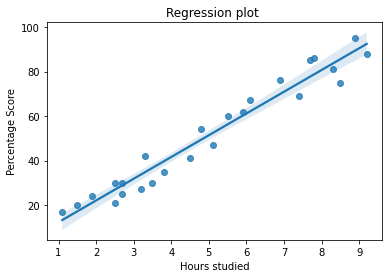

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x=mydata['Hours'],y=mydata['Scores'])
plt.title('Regression plot ')  
plt.ylabel('Percentage Score') 
plt.xlabel('Hours studied')
plt.show()
print(mydata.corr())

It's proven that the variables are positively correlated.



### Choose Target and features

We start with deviding the data into target(output) as y and features(input) as X.

In [ ]:
X = mydata.iloc[:,[0]].values
y = mydata.iloc[:,[1]].values


### Splitting The Data 

We're going to use Scikit-Learn's built-in train_test_split() method to split the data to training data and testing data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X,y,random_state=0)

### Model Training

We're going to train the model with the training data and then plot the regression line.

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train, y_train)

### Making Predictions

Now, let's make some predictions with our trained model using the testing data.

In [ ]:
y_pred= lr.predict(X_test)

In [ ]:
#comparing the actual values with the predicted ones
df=pd.DataFrame({'Hours': [k[0] for k in X_test],
                 'Predicted': [i[0] for i in y_pred],
                 'Actual': [j[0] for j in y_test]})
df

,Hours,Predicted,Actual
0,1.5,16.844722,20
1,3.2,33.745575,27
2,7.4,75.500624,69
3,2.5,26.786400,30
4,5.9,60.588106,62
5,3.8,39.710582,35
6,1.9,20.821393,24


### Evaluating the Model

To evaluate the model, we're going to use mean absolute error which is the mean the absolute values of the difference between the forecasted value and the actual value.

In [ ]:
from sklearn.metrics import mean_absolute_error
print ('Mean Absolute Error=',mean_absolute_error(y_test,y_pred))


Mean Absolute Error= 4.130879918502482


### What will be the percentage score of a student who studies 9.25 hours?

In [ ]:
hours=np.array([9.25])
hours=hours.reshape(-1,1)
prediction = lr.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(prediction[0][0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652
